# Clustering: Explore Exercises

In [2]:
# Imports
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling

from wrangle_zillow import wrangle_zillow, scale_data, split_zillow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

pd.options.display.float_format = '{:20,.2f}'.format

import acquire
import env
import explore


# Acquire

In [5]:
df = wrangle_zillow()


In [6]:
df.head()

,parcelid,logerror,transactiondate,bathrooms,bedrooms,buildingqualitytypeid,square_feet,fips,latitude,longitude,...,tax_value,assessmentyear,landtaxvaluedollarcnt,taxes,heatingorsystemdesc,county,age_in_years,Bathrooms_cat,Bedrooms_cat,tax_rate
0,14297519,0.03,2017-01-01,3.50,4.00,6.00,"3,100.00","6,059.00","33,634,931.00","-117,869,207.00",...,"1,023,282.00","2,016.00","537,569.00","11,013.72",None,Orange,23.00,3.50,4+,1.08
1,17052889,0.06,2017-01-01,1.00,2.00,6.00,"1,465.00","6,111.00","34,449,266.00","-119,281,531.00",...,"464,000.00","2,016.00","376,000.00","5,672.48",None,Ventura,54.00,1.00,2.00,1.22
2,14186244,0.01,2017-01-01,2.00,3.00,6.00,"1,243.00","6,059.00","33,886,168.00","-117,823,170.00",...,"564,778.00","2,016.00","479,489.00","6,488.30",None,Orange,59.00,2.00,3.00,1.15
3,12177905,-0.10,2017-01-01,3.00,4.00,8.00,"2,376.00","6,037.00","34,245,180.00","-118,240,722.00",...,"145,143.00","2,016.00","36,225.00","1,777.51",Central,Los_Angeles,51.00,3.00,4+,1.22
4,10887214,0.01,2017-01-01,3.00,3.00,8.00,"1,312.00","6,037.00","34,185,120.00","-118,414,640.00",...,"119,407.00","2,016.00","45,726.00","1,533.89",Central,Los_Angeles,57.00,3.00,3.00,1.28


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66858 entries, 0 to 77379
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   parcelid                    66858 non-null  int64  
 1   logerror                    66858 non-null  float64
 2   transactiondate             66858 non-null  object 
 3   bathrooms                   66858 non-null  float64
 4   bedrooms                    66858 non-null  float64
 5   buildingqualitytypeid       66858 non-null  float64
 6   square_feet                 66858 non-null  float64
 7   fips                        66858 non-null  float64
 8   latitude                    66858 non-null  float64
 9   longitude                   66858 non-null  float64
 10  lotsizesquarefeet           66858 non-null  float64
 11  rawcensustractandblock      66858 non-null  float64
 12  regionidcity                66858 non-null  float64
 13  regionidcounty              668

array([[<AxesSubplot:title={'center':'parcelid'}>,
        <AxesSubplot:title={'center':'logerror'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'buildingqualitytypeid'}>],
       [<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'lotsizesquarefeet'}>],
       [<AxesSubplot:title={'center':'rawcensustractandblock'}>,
        <AxesSubplot:title={'center':'regionidcity'}>,
        <AxesSubplot:title={'center':'regionidcounty'}>,
        <AxesSubplot:title={'center':'regionidzip'}>,
        <AxesSubplot:title={'center':'roomcnt'}>],
       [<AxesSubplot:title={'center':'unitcnt'}>,
        <AxesSubplot:title={'center':'yearbuilt'}>,
        <AxesSubplot:title={'center':'structuretaxvaluedollarcnt'}>,
        <Axe

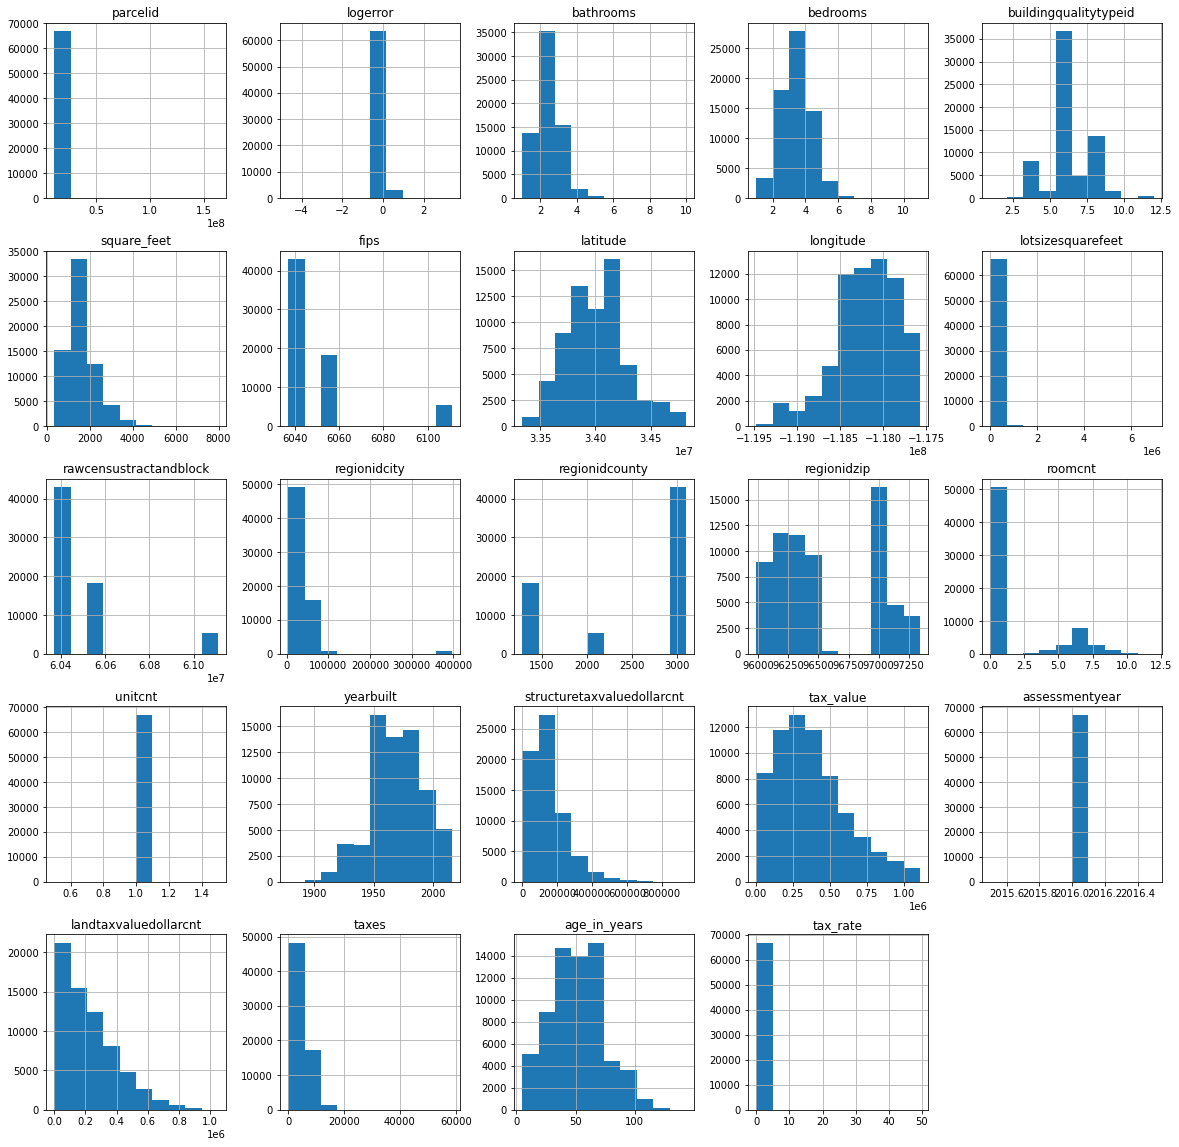

In [9]:
df.hist(figsize=[20,20])

In [10]:
df.logerror.describe()

count              66,858.00
mean                    0.02
std                     0.16
min                    -4.66
25%                    -0.02
50%                     0.01
75%                     0.04
max                     3.39
Name: logerror, dtype: float64

In [11]:
df['logerror_class'] = pd.qcut(df.logerror, q=4, labels=['q1','q2','q3','q4'])
df.logerror_class.head()

0    q3
1    q4
2    q2
3    q1
4    q3
Name: logerror_class, dtype: category
Categories (4, object): ['q1' < 'q2' < 'q3' < 'q4']

In [23]:
cat_vars = ['fips']

quant_vars = ['square_feet',                         
              'lotsizesquarefeet',              
              'tax_value',
              'taxes',              
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms'
              ]

In [13]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .70):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [14]:
def remove_columns(df, cols_to_remove):  
    df = df.drop(columns=cols_to_remove)
    return df

In [15]:

def wrangle_zillow():
    df = acquire.get_zillow_data()
    
    # Restrict df to only properties that meet single unit use criteria
    single_use = [261, 262, 263, 264, 266, 268, 273, 276, 279]
    df = df[df.propertylandusetypeid.isin(single_use)]
    
    # Restrict df to only those properties with at least 1 bath & bed and 350 sqft area
    df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull())\
            & (df.calculatedfinishedsquarefeet>350)]

    # Handle missing values i.e. drop columns and rows based on a threshold
    df = handle_missing_values(df)
    
    # Add column for counties
    df['county'] = np.where(df.fips == 6037, 'Los_Angeles',
                           np.where(df.fips == 6059, 'Orange', 
                                   'Ventura'))    
    # drop columns not needed
    df = remove_columns(df, ['id',
       'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 'heatingorsystemtypeid'
       ,'propertycountylandusecode', 'propertylandusetypeid','propertyzoningdesc', 
        'censustractandblock', 'propertylandusedesc'])


    # replace nulls in unitcnt with 1
    df.unitcnt.fillna(1, inplace = True)
    
    # assume that since this is Southern CA, null means 'None' for heating system
    df.heatingorsystemdesc.fillna('None', inplace = True)
    
    # replace nulls with median values for select columns
    df.lotsizesquarefeet.fillna(7313, inplace = True)
    df.buildingqualitytypeid.fillna(6.0, inplace = True)

    # Columns to look for outliers
    df = df[df.taxvaluedollarcnt < 5_000_000]
    df[df.calculatedfinishedsquarefeet < 8000]
    
    # Just to be sure we caught all nulls, drop them here
    df = df.dropna()
    
    return df

In [24]:
train, validate, test = split_zillow(df,stratify_by='county')

In [25]:
df['built_after_1970'] = df.yearbuilt.apply(lambda x: 1 if x >= 1970 else 0)
df.built_after_1970.head()

0    1
1    0
2    0
3    1
4    0
Name: built_after_1970, dtype: int64

In [26]:
binary_vars = ['built_after_1970']
categorical_vars = ['logerror_class', 'county',
                    'Bedrooms_cat', 'Bathrooms_cat', 'buildingqualitytypeid']
quant_vars = ['square_feet',
              'lotsizesquarefeet',
              'tax_value',
              'taxes',
              'age_in_years',
              'tax_rate',
              'bedrooms',
              'bathrooms',
              'logerror',
              'latitude',
              'longitude']
categorical_target = 'logerror_class'
continuous_target = 'logerror'

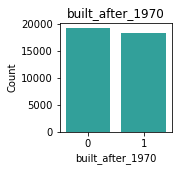

   built_after_1970  Count              Percent
1                 0  19157                51.17
0                 1  18283                48.83
_________________________________________________________________


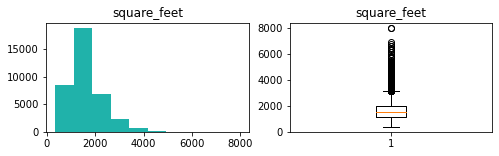

count              37,440.00
mean                1,627.43
std                   686.59
min                   360.00
25%                 1,151.00
50%                 1,472.00
75%                 1,941.00
max                 7,970.00
Name: square_feet, dtype: float64


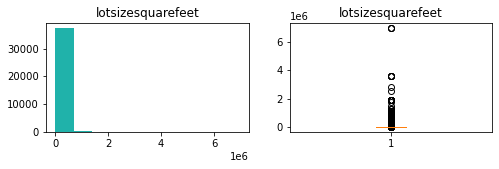

count              37,440.00
mean               28,059.77
std               116,539.06
min                   435.00
25%                 5,974.00
50%                 7,313.00
75%                10,192.25
max             6,971,010.00
Name: lotsizesquarefeet, dtype: float64


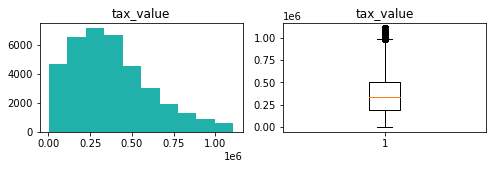

count              37,440.00
mean              376,263.65
std               236,143.97
min                 3,254.00
25%               195,043.75
50%               338,092.50
75%               510,000.00
max             1,108,401.00
Name: tax_value, dtype: float64


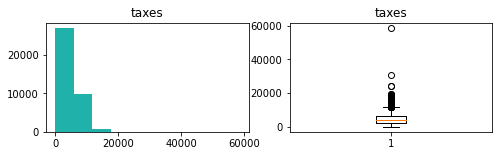

count              37,440.00
mean                4,664.28
std                 2,802.53
min                    19.92
25%                 2,574.21
50%                 4,193.36
75%                 6,184.23
max                58,634.77
Name: taxes, dtype: float64


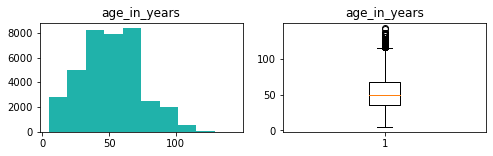

count              37,440.00
mean                   51.83
std                    22.48
min                     5.00
25%                    35.00
50%                    50.00
75%                    67.00
max                   143.00
Name: age_in_years, dtype: float64


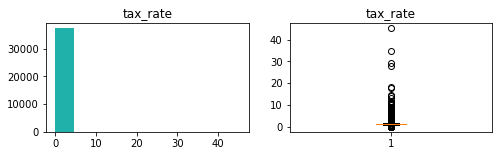

count              37,440.00
mean                    1.32
std                     0.53
min                     0.01
25%                     1.17
50%                     1.23
75%                     1.35
max                    45.29
Name: tax_rate, dtype: float64


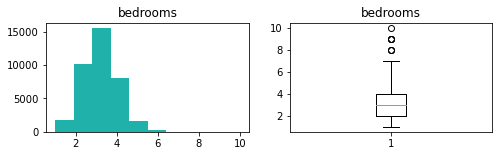

count              37,440.00
mean                    2.96
std                     0.96
min                     1.00
25%                     2.00
50%                     3.00
75%                     4.00
max                    10.00
Name: bedrooms, dtype: float64


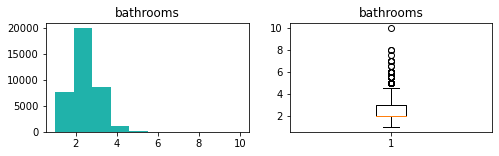

count              37,440.00
mean                    2.17
std                     0.79
min                     1.00
25%                     2.00
50%                     2.00
75%                     3.00
max                    10.00
Name: bathrooms, dtype: float64


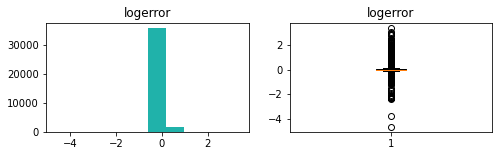

count              37,440.00
mean                    0.02
std                     0.16
min                    -4.66
25%                    -0.02
50%                     0.01
75%                     0.04
max                     3.39
Name: logerror, dtype: float64


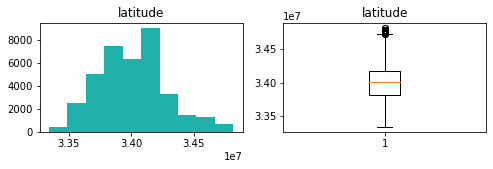

count              37,440.00
mean           34,011,020.61
std               268,570.04
min            33,339,527.00
25%            33,813,905.00
50%            34,017,160.00
75%            34,180,482.75
max            34,818,767.00
Name: latitude, dtype: float64


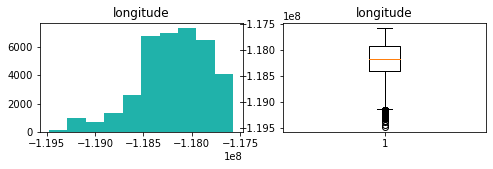

count              37,440.00
mean         -118,194,320.73
std               361,646.73
min          -119,475,265.00
25%          -118,408,196.00
50%          -118,159,759.50
75%          -117,918,220.50
max          -117,572,421.00
Name: longitude, dtype: float64


In [27]:
explore.explore_univariate(train, binary_vars, quant_vars)

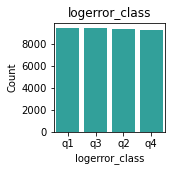

   logerror_class  Count              Percent
q1             q1   9407                25.13
q3             q3   9398                25.10
q4             q2   9373                25.03
q2             q4   9262                24.74
_________________________________________________________________


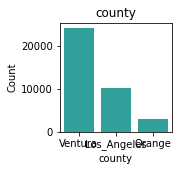

                  county  Count              Percent
Los_Angeles      Ventura  24078                64.31
Orange       Los_Angeles  10285                27.47
Ventura           Orange   3077                 8.22
_________________________________________________________________


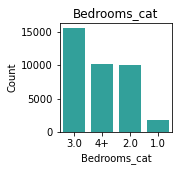

            Bedrooms_cat  Count              Percent
3.0                 3.00  15520                41.45
2.0                   4+  10149                27.11
4+                  2.00   9957                26.59
1.0                 1.00   1814                 4.85
_________________________________________________________________


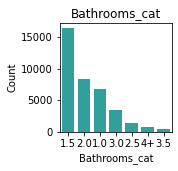

           Bathrooms_cat  Count              Percent
2.0                 1.50  16340                43.64
3.0                 2.00   8302                22.17
1.0                 1.00   6807                18.18
2.5                 3.00   3520                 9.40
4+                  2.50   1325                 3.54
1.5                   4+    768                 2.05
3.5                 3.50    378                 1.01
_________________________________________________________________


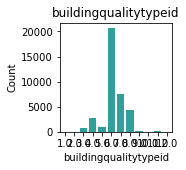

       buildingqualitytypeid  Count              Percent
 6.00                   6.00  20630                55.10
 8.00                   7.00   7600                20.30
 4.00                   8.00   4434                11.84
 7.00                   4.00   2749                 7.34
 9.00                   5.00    866                 2.31
 5.00                   3.00    809                 2.16
11.00                   9.00    219                 0.58
 3.00                  11.00     81                 0.22
10.00                  10.00     35                 0.09
12.00                  12.00     12                 0.03
 1.00                   1.00      4                 0.01
 2.00                   2.00      1                 0.00
_________________________________________________________________


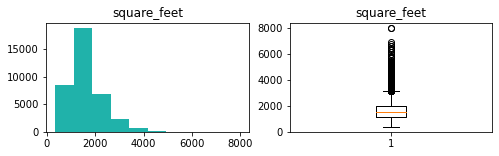

count              37,440.00
mean                1,627.43
std                   686.59
min                   360.00
25%                 1,151.00
50%                 1,472.00
75%                 1,941.00
max                 7,970.00
Name: square_feet, dtype: float64


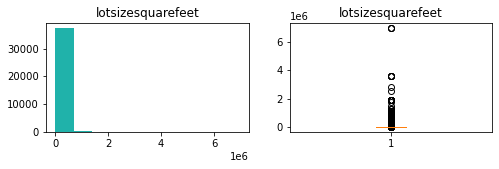

count              37,440.00
mean               28,059.77
std               116,539.06
min                   435.00
25%                 5,974.00
50%                 7,313.00
75%                10,192.25
max             6,971,010.00
Name: lotsizesquarefeet, dtype: float64


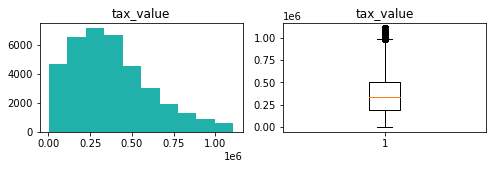

count              37,440.00
mean              376,263.65
std               236,143.97
min                 3,254.00
25%               195,043.75
50%               338,092.50
75%               510,000.00
max             1,108,401.00
Name: tax_value, dtype: float64


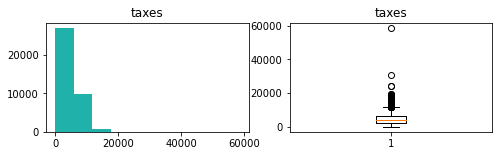

count              37,440.00
mean                4,664.28
std                 2,802.53
min                    19.92
25%                 2,574.21
50%                 4,193.36
75%                 6,184.23
max                58,634.77
Name: taxes, dtype: float64


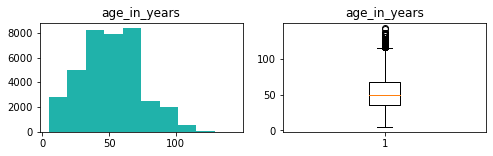

count              37,440.00
mean                   51.83
std                    22.48
min                     5.00
25%                    35.00
50%                    50.00
75%                    67.00
max                   143.00
Name: age_in_years, dtype: float64


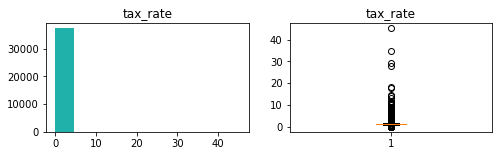

count              37,440.00
mean                    1.32
std                     0.53
min                     0.01
25%                     1.17
50%                     1.23
75%                     1.35
max                    45.29
Name: tax_rate, dtype: float64


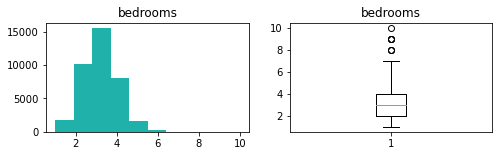

count              37,440.00
mean                    2.96
std                     0.96
min                     1.00
25%                     2.00
50%                     3.00
75%                     4.00
max                    10.00
Name: bedrooms, dtype: float64


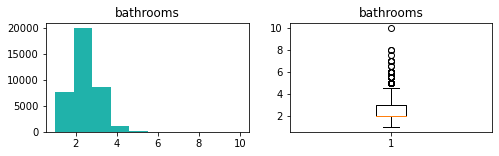

count              37,440.00
mean                    2.17
std                     0.79
min                     1.00
25%                     2.00
50%                     2.00
75%                     3.00
max                    10.00
Name: bathrooms, dtype: float64


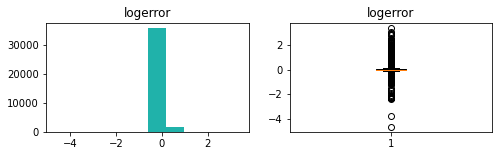

count              37,440.00
mean                    0.02
std                     0.16
min                    -4.66
25%                    -0.02
50%                     0.01
75%                     0.04
max                     3.39
Name: logerror, dtype: float64


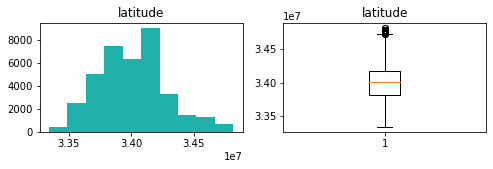

count              37,440.00
mean           34,011,020.61
std               268,570.04
min            33,339,527.00
25%            33,813,905.00
50%            34,017,160.00
75%            34,180,482.75
max            34,818,767.00
Name: latitude, dtype: float64


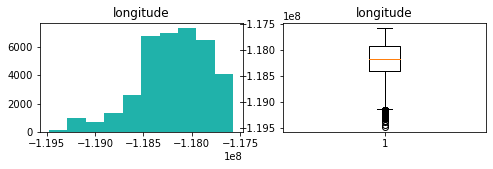

count              37,440.00
mean         -118,194,320.73
std               361,646.73
min          -119,475,265.00
25%          -118,408,196.00
50%          -118,159,759.50
75%          -117,918,220.50
max          -117,572,421.00
Name: longitude, dtype: float64


In [28]:
explore.explore_univariate(train, categorical_vars, quant_vars)

# Prep 

In [8]:
cont_vars = ['transactiondate', 'taxamount', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'structuretaxvaluedollarcnt','roomcnt','lotsizesquarefeet','longitude','latitude','fips', 'calculatedfinishedsquarefeet', 'bedroomcnt','bathroomcnt']

In [9]:

def scale_my_data(train, validate, test):
    scaler = StandardScaler()
    scaler.fit(train[['roomcnt','lotsizesquarefeet','longitude','latitude','fips', 'calculatedfinishedsquarefeet', 'bedroomcnt','bathroomcnt']])
    X_train_scaled = scaler.transform(train[['roomcnt','lotsizesquarefeet','longitude','latitude','fips', 'calculatedfinishedsquarefeet', 'bedroomcnt','bathroomcnt']])
    X_validate_scaled = scaler.transform(validate[['roomcnt','lotsizesquarefeet','longitude','latitude','fips', 'calculatedfinishedsquarefeet', 'bedroomcnt','bathroomcnt']])
    X_test_scaled = scaler.transform(test[['roomcnt','lotsizesquarefeet','longitude','latitude','fips', 'calculatedfinishedsquarefeet', 'bedroomcnt','bathroomcnt']])

    train[['roomcnt_scaled','lotsizesquarefeet_scaled','longitude_scaled','latitude_scaled','fips_scaled', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled','bathroomcnt_scaled']] = X_train_scaled
    validate[['roomcnt_scaled','lotsizesquarefeet_scaled','longitude_scaled','latitude_scaled','fips_scaled', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled','bathroomcnt_scaled']] = X_validate_scaled
    test[['roomcnt_scaled','lotsizesquarefeet_scaled','longitude_scaled','latitude_scaled','fips_scaled', 'calculatedfinishedsquarefeet_scaled', 'bedroomcnt_scaled','bathroomcnt_scaled']] = X_test_scaled
    
    return train, validate, test


In [10]:
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  657104
validate observations:  281624
test observations:  234696


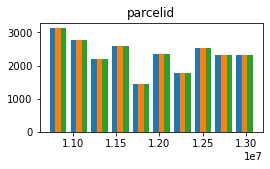

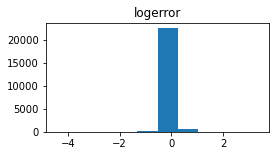

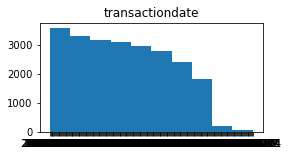

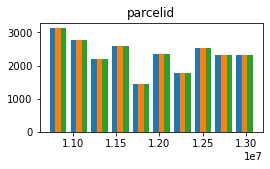

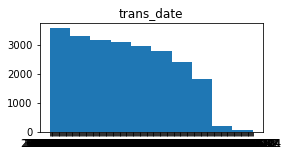

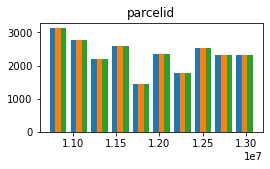

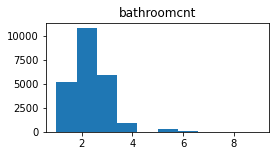

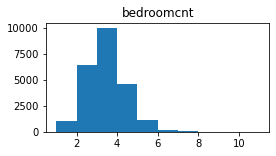

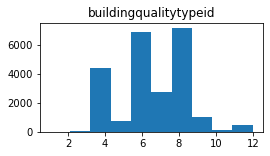

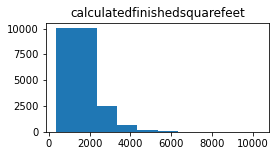

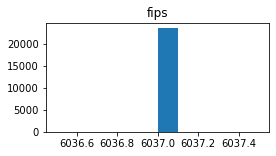

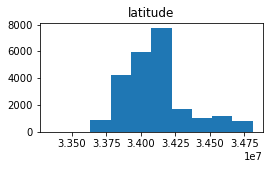

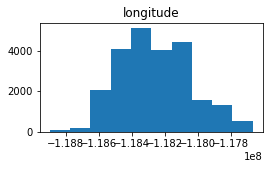

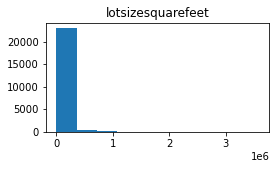

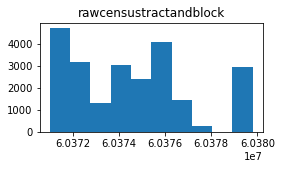

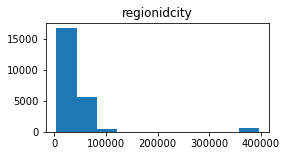

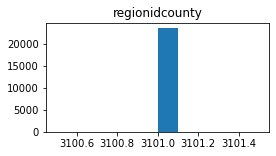

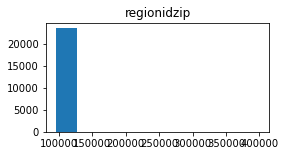

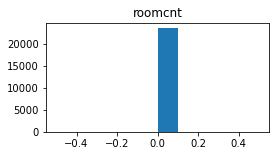

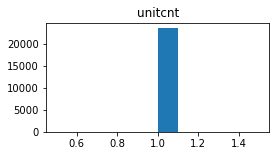

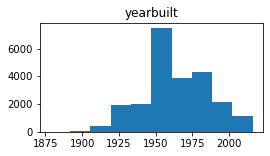

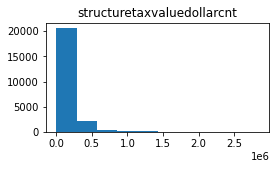

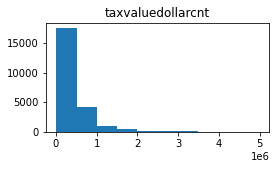

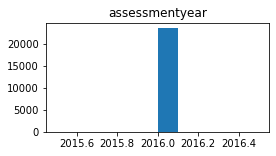

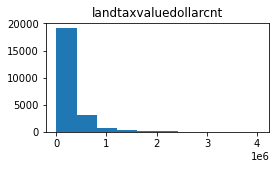

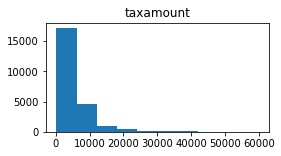

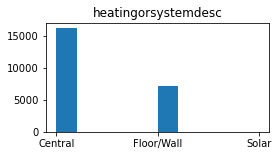

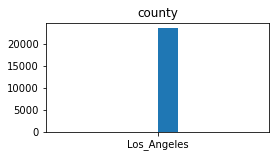

In [11]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [12]:
binary_vars = ['orange_cnty','ventura_cnty']
categorical_vars = ['prop_land_type_id', 'fips', 'region_id_county']
quant_vars = [ 'bathrooms', 'bedrooms', 'property_sqft', 'lot_sqft', 'struct_tax_value', 'tax_value', 'land_tax_value', 'tax_amount', 'log_error']
categorical_target = ['log_error_class']
continuous_target = ['log_error']

In [13]:

train.shape, validate.shape, test.shape

((23468, 28), (10058, 28), (8382, 28))

In [14]:
train.head()

,parcelid,logerror,transactiondate,parcelid,trans_date,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,...,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,heatingorsystemdesc,county
73883,13091453,-0.02,2017-09-06,13091453,2017-09-06,13091453,2.00,3.00,8.00,"1,463.00",...,0.00,1.00,"1,983.00","113,000.00","565,000.00","2,016.00","452,000.00","7,245.26",Central,Los_Angeles
16946,10900314,-0.03,2017-03-15,10900314,2017-03-15,10900314,2.00,3.00,8.00,"1,702.00",...,0.00,1.00,"1,930.00","159,778.00","626,403.00","2,016.00","466,625.00","7,678.96",Floor/Wall,Los_Angeles
39620,10712101,-0.04,2017-05-25,10712101,2017-05-25,10712101,3.00,3.00,8.00,"2,095.00",...,0.00,1.00,"1,959.00","187,845.00","273,735.00","2,016.00","85,890.00","3,477.68",Central,Los_Angeles
68032,12716900,-0.01,2017-08-18,12716900,2017-08-18,12716900,1.00,3.00,4.00,"1,058.00",...,0.00,1.00,"1,950.00","81,016.00","355,336.00","2,016.00","274,320.00","4,693.38",Floor/Wall,Los_Angeles
243,11804310,0.34,2017-01-03,11804310,2017-01-03,11804310,1.00,2.00,5.00,660.00,...,0.00,1.00,"1,912.00","108,225.00","292,207.00","2,016.00","183,982.00","3,652.06",Floor/Wall,Los_Angeles


In [15]:
train.columns

Index(['parcelid', 'logerror', 'transactiondate', 'parcelid', 'trans_date',
       'parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedfinishedsquarefeet', 'fips', 'latitude', 'longitude',
       'lotsizesquarefeet', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'unitcnt', 'yearbuilt',
       'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'assessmentyear',
       'landtaxvaluedollarcnt', 'taxamount', 'heatingorsystemdesc', 'county'],
      dtype='object')

Text(0.5, 1.0, "Is logerror significantly different for properties in\nLA County vs Orange County vs Ventura County\nand/or by it's Year built?")

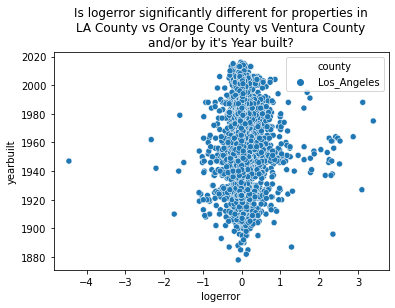

In [28]:
sns.scatterplot(data=train, x="logerror", y="yearbuilt", hue ="county" )
plt.title("Is logerror significantly different for properties in\nLA County vs Orange County vs Ventura County\nand/or by it's Year built?")

## 1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

#  Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

## 2. Answer those questions through a mix of statistical tests and visualizations.